# Bibliotecas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
from pathlib import Path
import os

# Bases

In [4]:
# Diretório base onde os arquivos CSV estão localizados
base_diretório = Path(os.getcwd())
diretório_princapl = base_diretório.parent
caminho = diretório_princapl / 'Bases'

# Definir caminho dos arquivos da Bitcoin e da BNB, pois são as duas que vamos rodar (definido pelo teste de similaridade das bases)
arquivos = {
    'Bitcoin': caminho / 'Bitcoin Historical Data.csv',
    'Ethereum': caminho / 'Ethereum Historical Data.csv',
    'BNB': caminho / 'BNB Historical Data.csv',
    'Solana': caminho / 'Solana Historical Data.csv',
}

# Ler o arquivo ano.txt e pegar o ano
with open(diretório_princapl/'data'/'ano.txt', 'r') as file:
    ano = int(file.read().strip())

# Função para tratar os dados de cada criptomoeda
def tratar_dados_cripto(caminho_csv):
    # Ler o arquivo CSV
    acao = pd.read_csv(caminho_csv)
    acao['Date'] = pd.to_datetime(acao['Date'])

    return acao

# Aplicar a função para cada criptomoeda e armazenar o resultado em um DataFrame
base_bitcoin = tratar_dados_cripto(arquivos['Bitcoin'])
base_ethereum = tratar_dados_cripto(arquivos['Ethereum'])
base_bnb = tratar_dados_cripto(arquivos['BNB'])
base_solana = tratar_dados_cripto(arquivos['Solana'])


In [5]:
base_bitcoin

,Date,Price,Open,High,Low,Volume,Change %
0,2017-01-01,995.4,963.4,1001.6,956.1,41150.0,3.33
1,2017-01-02,1017.0,995.4,1031.7,990.2,64950.0,2.17
2,2017-01-03,1033.3,1017.0,1035.5,1006.5,54790.0,1.60
3,2017-01-04,1135.4,1033.3,1148.5,1022.3,156270.0,9.88
4,2017-01-05,989.3,1135.4,1150.6,874.5,240010.0,-12.86
...,...,...,...,...,...,...,...
2795,2024-08-27,59450.9,62832.2,63201.4,58187.3,108530.0,-5.40
2796,2024-08-28,59016.0,59425.6,60198.4,57912.1,109470.0,-0.73
2797,2024-08-29,59373.5,59027.3,61150.6,58807.1,87190.0,0.61
2798,2024-08-30,59119.7,59371.7,59817.6,57874.7,87310.0,-0.43


# Gráficos

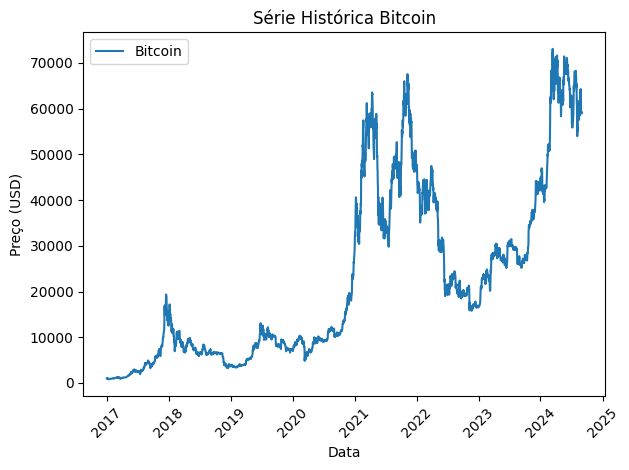

In [6]:
# Plotar os gráficos das quatro criptomoedas no mesmo gráfico
plt.plot(base_bitcoin['Date'], base_bitcoin['Price'], label='Bitcoin')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica Bitcoin')

# date_format = DateFormatter('%Y')
# plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

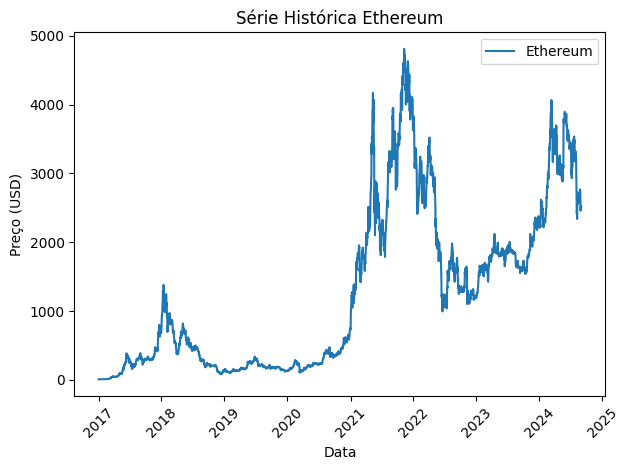

In [7]:
plt.plot(base_ethereum['Date'], base_ethereum['Price'], label='Ethereum')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica Ethereum')

# date_format = DateFormatter('%Y')
# plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

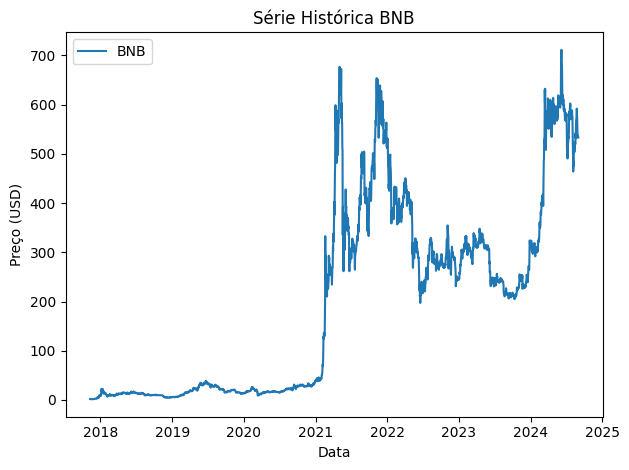

In [8]:
plt.plot(base_bnb['Date'], base_bnb['Price'], label='BNB')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica BNB')

date_format = DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend()
plt.tight_layout()
plt.show()

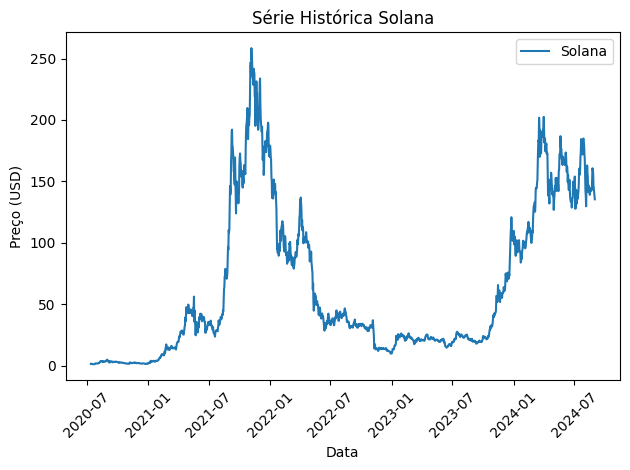

In [9]:
plt.plot(base_solana['Date'], base_solana['Price'], label='Solana')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica Solana')

# date_format = DateFormatter('%Y')
# plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

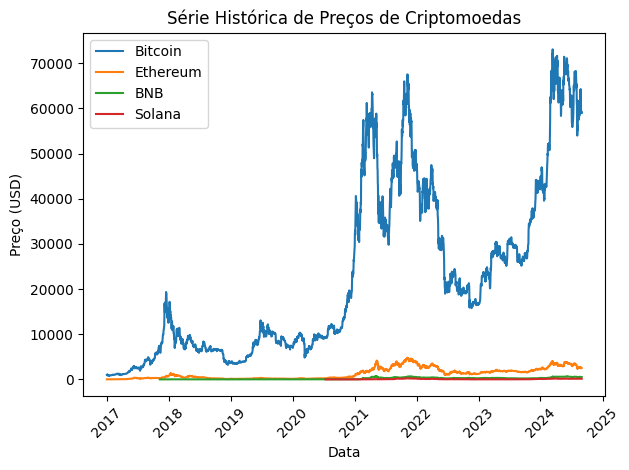

In [10]:
# Plotar os gráficos das quatro criptomoedas no mesmo gráfico
plt.plot(base_bitcoin['Date'], base_bitcoin['Price'], label='Bitcoin')
plt.plot(base_ethereum['Date'], base_ethereum['Price'], label='Ethereum')
plt.plot(base_bnb['Date'], base_bnb['Price'], label='BNB')
plt.plot(base_solana['Date'], base_solana['Price'], label='Solana')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica de Preços de Criptomoedas')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

date_format = DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


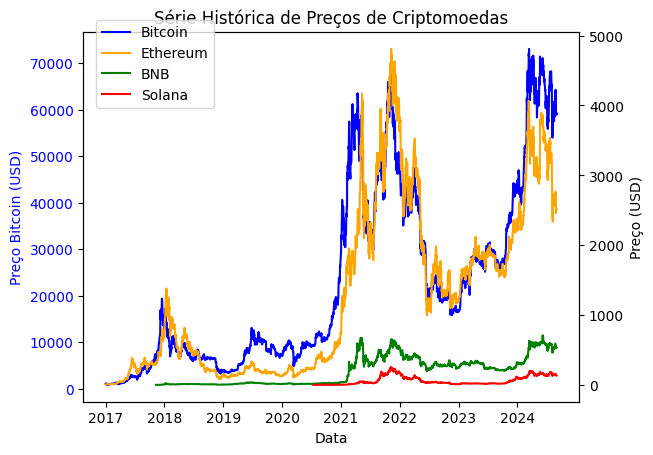

In [11]:
fig, ax1 = plt.subplots()

# Mostrar Bitcoin no eixo y principal
ax1.plot(base_bitcoin['Date'], base_bitcoin['Price'], label='Bitcoin', color='blue')
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço Bitcoin (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Plotar as outras criptomoedas no segundo eixo y
ax2.plot(base_ethereum['Date'], base_ethereum['Price'], label='Ethereum', color='orange')
ax2.plot(base_bnb['Date'], base_bnb['Price'], label='BNB', color='green')
ax2.plot(base_solana['Date'], base_solana['Price'], label='Solana', color='red')
ax2.set_ylabel('Preço (USD)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Título
plt.title('Série Histórica de Preços de Criptomoedas')

# Exibir apenas os anos no eixo X
years = pd.date_range(start=base_bitcoin['Date'].min(), end=base_bitcoin['Date'].max(), freq='YS')
ax1.set_xticks(years)
ax1.xaxis.set_major_formatter(DateFormatter('%Y'))

# Adicionar legenda
fig.legend(loc="upper left", bbox_to_anchor=(0.135, 0.92))

# Mosrar gráfico
plt.show()


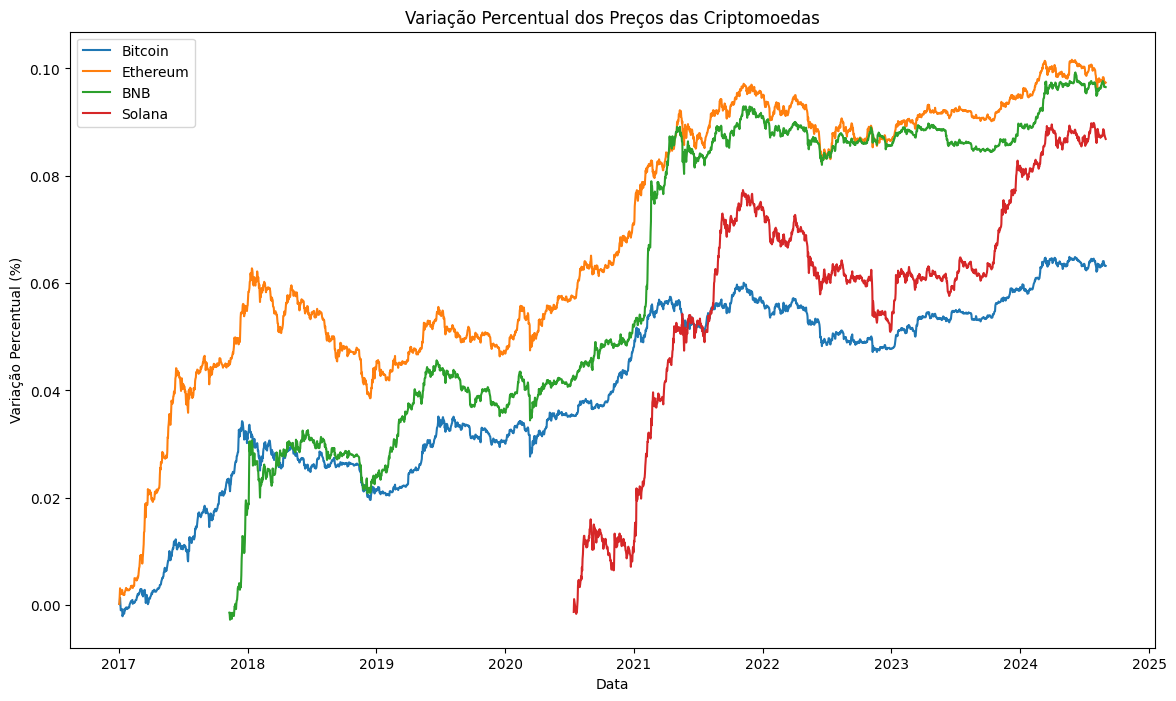

In [12]:


# Calcular a variação percentual das criptomoedas
def calcular_variacao_percentual(df, column):
    df['Price Variation %'] = (1 + df[column].pct_change() / 100).cumprod() -1
    df['Price Variation %'] = (1 + df[column].pct_change() / 100).cumprod() -1
    return df

# Aplicar a função que calcula a variação percentual com base no preço
base_bitcoin = calcular_variacao_percentual(base_bitcoin, 'Price')
base_ethereum = calcular_variacao_percentual(base_ethereum, 'Price')
base_bnb = calcular_variacao_percentual(base_bnb, 'Price')
base_solana = calcular_variacao_percentual(base_solana, 'Price')


# Gerar grafico da Variação Percentual dos Preços das Criptomoedas
plt.figure(figsize=(14, 8))
plt.plot(base_bitcoin['Date'], base_bitcoin['Price Variation %'], label='Bitcoin')
plt.plot(base_ethereum['Date'], base_ethereum['Price Variation %'], label='Ethereum')
plt.plot(base_bnb['Date'], base_bnb['Price Variation %'], label='BNB')
plt.plot(base_solana['Date'], base_solana['Price Variation %'], label='Solana')

# Dar título pro grafico e pros eixos
plt.xlabel('Data')
plt.ylabel('Variação Percentual (%)')
plt.title('Variação Percentual dos Preços das Criptomoedas')

# Colocar legenda no gráfico
plt.legend()

# Mostrar gráfico
plt.show()
